  * `id`: 고유 id
  * `date`: 버스 운행 날짜
  * `route_id`: 버스 노선 ID
  * `vh_id`: 버스 ID
  * `route_nm`: 버스 노선 실제 번호
  * `now_latitude`: 현재 정류소의 위도
  * `now_longitude`: 현재 정류소의 경도
  * `now_station`: 현재 정류소의 이름
  * `now_arrive_time`: 현재 정류장에 도착한 시간
  * `distance`: 현재 정류장에서 다음 정류장까지 실제 이동한 거리
  * `next_station`: 다음 정류소 이름
  * `next_latitude`: 다음 정류소의 위도
  * `next_longitude`: 다음 정류소의 경도
  * `next_arrive_time`: 다음 정류장에 도착할 때 까지 걸린 시간(단위:초)

### 1. 필요한 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. 데이터 읽어오기

In [2]:
df_train = pd.read_csv('data/229611_버스 운행시간 예측 경진대회_data/train.csv')
df_test = pd.read_csv('data/229611_버스 운행시간 예측 경진대회_data/test.csv')

In [3]:
df_train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64


In [4]:
df_test.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355


### 3. 데이터 전처리하기

In [5]:
sns.set_theme(style='whitegrid')

<Axes: xlabel='next_arrive_time', ylabel='Count'>

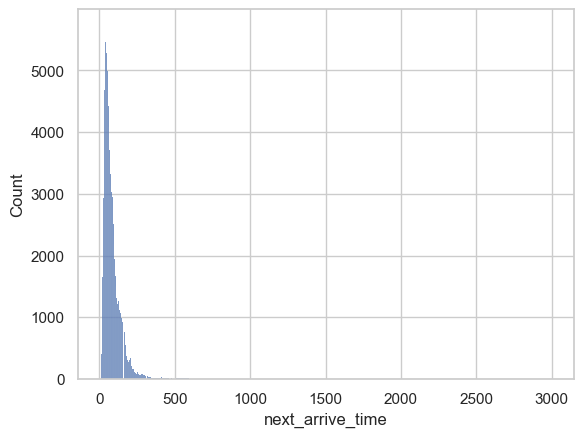

In [6]:
sns.histplot(df_train['next_arrive_time'])

타겟 값이 왜곡되어 있기 때문에 로그를 취합니다.

In [7]:
df_train['next_arrive_time'] = np.log1p(df_train['next_arrive_time'])

<Axes: xlabel='next_arrive_time', ylabel='Count'>

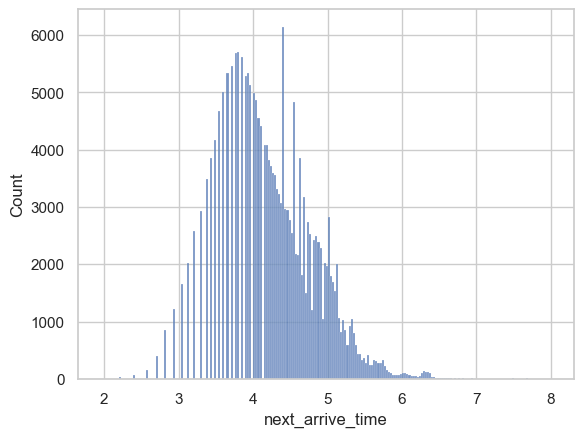

In [8]:
sns.histplot(df_train['next_arrive_time'])

In [9]:
df_train.describe()

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time
count,210457.000000,2.104570e+05,2.104570e+05,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000
mean,105228.000000,4.052491e+08,7.988694e+06,33.434528,126.603451,490.256100,33.434711,126.603687,4.242005
std,60753.847139,9.132404e+04,6.774077e+03,0.102350,0.123961,520.563932,0.102224,0.123838,0.619912
min,0.000000,4.051360e+08,7.983000e+06,33.244382,126.473300,97.000000,33.244382,126.473300,1.945910
25%,52614.000000,4.051365e+08,7.983093e+06,33.325283,126.523900,291.000000,33.325283,126.524550,3.806662
50%,105228.000000,4.053201e+08,7.983431e+06,33.484667,126.551050,384.000000,33.484860,126.551050,4.204693
75%,157842.000000,4.053201e+08,7.997041e+06,33.500197,126.650322,542.000000,33.500228,126.650322,4.634729
max,210456.000000,4.053281e+08,7.997124e+06,33.556167,126.935188,7461.000000,33.556167,126.935188,8.005367


In [10]:
df_train.isnull().sum()

id                  0
date                0
route_id            0
vh_id               0
route_nm            0
now_latitude        0
now_longitude       0
now_station         0
now_arrive_time     0
distance            0
next_station        0
next_latitude       0
next_longitude      0
next_arrive_time    0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
station_name = list(df_train['now_station']) + list(df_train['next_station'])
station_name = set(station_name)
le.fit(list(station_name))

LabelEncoder()

In [12]:
df_train['now_station'] = le.transform(df_train['now_station'])
df_test['now_station'] = le.transform(df_test['now_station'])
df_train['next_station'] = le.transform(df_train['next_station'])
df_test['next_station'] = le.transform(df_test['next_station'])

In [13]:
df_train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,239,06시,266.0,227,33.457724,126.554014,3.218876
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,227,06시,333.0,228,33.458783,126.557353,3.610918
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,228,06시,415.0,235,33.459893,126.561624,3.713572
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,41,06시,578.0,249,33.484860,126.542928,3.761200
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,63,07시,374.0,221,33.485822,126.490897,4.174387


4. 데이터 분석하기

In [14]:
print(df_train['route_id'].values)
print(df_train['route_id'].value_counts())

[405136001 405136001 405136001 ... 405328102 405328102 405328102]
route_id
405136522    31941
405328102    25884
405136001    21668
405328101    19150
405320116    15451
405320114    12999
405320112    11871
405136521    11826
405136012     8037
405320111     7895
405320122     7723
405136002     7709
405320127     5950
405320117     5102
405320121     2670
405320126     2665
405320113     2631
405320118     2558
405320124     2368
405320115     2289
405136007     2070
Name: count, dtype: int64


In [15]:
print(df_train['now_arrive_time'].values)
print(df_train['now_arrive_time'].value_counts())

['06시' '06시' '06시' ... '21시' '21시' '21시']
now_arrive_time
08시    13838
09시    13700
07시    13581
16시    13476
12시    13433
19시    13275
13시    13197
17시    13090
10시    13011
18시    12987
15시    12846
14시    12592
11시    12524
20시    11852
21시    11230
06시     8409
22시     6470
05시      487
23시      454
00시        5
Name: count, dtype: int64


In [16]:
df_train['now_arrive_time'] = pd.to_numeric(df_train['now_arrive_time'].str.replace(pat=r'시', repl=r'', regex=True))
df_test['now_arrive_time'] = pd.to_numeric(df_test['now_arrive_time'].str.replace(pat=r'시', repl=r'', regex=True))

In [17]:
df_train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,239,6,266.0,227,33.457724,126.554014,3.218876
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,227,6,333.0,228,33.458783,126.557353,3.610918
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,228,6,415.0,235,33.459893,126.561624,3.713572
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,41,6,578.0,249,33.484860,126.542928,3.761200
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,63,7,374.0,221,33.485822,126.490897,4.174387


위도와 경도를 이용하여 거리 구하기

In [18]:
from haversine import haversine

In [19]:
# Train dataset
hb_list = []
for ind in range(df_train.shape[0]):
    hb1 = (df_train['now_latitude'][ind], df_train['now_longitude'][ind])
    hb2 = (df_train['next_latitude'][ind], df_train['next_longitude'][ind])
    result = haversine(hb1, hb2, unit='km')
    hb_list.append(result)

df_train['hb_dist'] = hb_list

# Test dataset
hb_list = []
for ind in range(df_test.shape[0]):
    hb1 = (df_test['now_latitude'][ind], df_test['now_longitude'][ind])
    hb2 = (df_test['next_latitude'][ind], df_test['next_longitude'][ind])
    result = haversine(hb1, hb2, unit='km')
    hb_list.append(result)
df_test['hb_dist'] = hb_list

In [20]:
df_train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hb_dist
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,239,6,266.0,227,33.457724,126.554014,3.218876,0.265256
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,227,6,333.0,228,33.458783,126.557353,3.610918,0.331382
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,228,6,415.0,235,33.459893,126.561624,3.713572,0.414990
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,41,6,578.0,249,33.484860,126.542928,3.761200,0.579031
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,63,7,374.0,221,33.485822,126.490897,4.174387,0.373792


In [21]:
df_train['day'] = pd.to_datetime(df_train['date']).dt.weekday
df_test['day'] = pd.to_datetime(df_test['date']).dt.weekday

In [22]:
df_train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hb_dist,day
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,239,6,266.0,227,33.457724,126.554014,3.218876,0.265256,1
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,227,6,333.0,228,33.458783,126.557353,3.610918,0.331382,1
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,228,6,415.0,235,33.459893,126.561624,3.713572,0.414990,1
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,41,6,578.0,249,33.484860,126.542928,3.761200,0.579031,1
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,63,7,374.0,221,33.485822,126.490897,4.174387,0.373792,1


In [23]:
df_train['route_nm'] = df_train['route_nm'].str.replace(pat=r'-', repl=r'', regex=True)
df_test['route_nm'] = df_test['route_nm'].str.replace(pat=r'-', repl=r'', regex=True)

In [24]:
df_train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,hb_dist,day
0,0,2019-10-15,405136001,7997025,3601,33.456267,126.551750,239,6,266.0,227,33.457724,126.554014,3.218876,0.265256,1
1,1,2019-10-15,405136001,7997025,3601,33.457724,126.554014,227,6,333.0,228,33.458783,126.557353,3.610918,0.331382,1
2,2,2019-10-15,405136001,7997025,3601,33.458783,126.557353,228,6,415.0,235,33.459893,126.561624,3.713572,0.414990,1
3,3,2019-10-15,405136001,7997025,3601,33.479705,126.543811,41,6,578.0,249,33.484860,126.542928,3.761200,0.579031,1
4,4,2019-10-15,405136001,7997025,3601,33.485662,126.494923,63,7,374.0,221,33.485822,126.490897,4.174387,0.373792,1


계산이 끝난 필요 없는 컬럼 제거

In [25]:
del_cols = ['id', 'date', 'route_id', 'vh_id', 'now_latitude',\
            'now_longitude', 'next_latitude', 'next_longitude']

In [26]:
df_train = df_train.drop(del_cols, axis=1)
df_test = df_test.drop(del_cols[1:], axis=1)

In [27]:
df_train.head()

,route_nm,now_station,now_arrive_time,distance,next_station,next_arrive_time,hb_dist,day
0,3601,239,6,266.0,227,3.218876,0.265256,1
1,3601,227,6,333.0,228,3.610918,0.331382,1
2,3601,228,6,415.0,235,3.713572,0.414990,1
3,3601,41,6,578.0,249,3.761200,0.579031,1
4,3601,63,7,374.0,221,4.174387,0.373792,1


### 5. 데이터셋 생성 후 모델 불러오기

In [28]:
X_train = df_train.drop(['next_arrive_time'], axis=1)
y_train = df_train['next_arrive_time']

X_test = df_test

In [29]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold

In [30]:
def rmse(y_pred, y_true):
    return np.sqrt(np.sum(np.power(y_true-y_pred, 2)) / np.size(y_pred))

In [31]:
kfold = KFold(n_splits=8, shuffle=True, random_state=777)

cb_model = CatBoostRegressor(
    iterations = 500,
    learning_rate = 0.05,
    depth = 10,
    eval_metric = 'RMSE',
    random_seed = 2023,
    bagging_temperature = 0.2,
    od_type = 'Iter',
    metric_period = 50,
    od_wait = 20
)

In [32]:

i_iter = 0
cv_score = []

for tr_ind, val_ind in kfold.split(X_train, y_train):
    tx, ty = X_train.iloc[tr_ind], y_train.iloc[tr_ind]
    vx, vy = X_train.iloc[val_ind], y_train.iloc[val_ind]

    cb_model.fit(tx, ty)

    pred = cb_model.predict(vx)

    i_iter += 1 
    loss = rmse(vy, pred)
    cv_score.append(loss)

print('\nRMSE: ', np.round(cv_score, 5))
print('\navergage RMSE: ', np.mean(cv_score))

0:	learn: 0.6063394	total: 156ms	remaining: 1m 17s
50:	learn: 0.4044111	total: 1.05s	remaining: 9.23s
100:	learn: 0.3758579	total: 1.95s	remaining: 7.72s
150:	learn: 0.3589730	total: 2.85s	remaining: 6.6s
200:	learn: 0.3485448	total: 3.76s	remaining: 5.6s
250:	learn: 0.3415130	total: 4.7s	remaining: 4.66s
300:	learn: 0.3360927	total: 5.64s	remaining: 3.73s
350:	learn: 0.3320455	total: 6.57s	remaining: 2.79s
400:	learn: 0.3290230	total: 7.51s	remaining: 1.85s
450:	learn: 0.3265886	total: 8.44s	remaining: 917ms
499:	learn: 0.3244284	total: 9.35s	remaining: 0us
0:	learn: 0.6058601	total: 19.6ms	remaining: 9.78s
50:	learn: 0.4044038	total: 931ms	remaining: 8.2s
100:	learn: 0.3746240	total: 1.85s	remaining: 7.33s
150:	learn: 0.3575472	total: 2.76s	remaining: 6.38s
200:	learn: 0.3473389	total: 3.66s	remaining: 5.45s
250:	learn: 0.3403011	total: 4.58s	remaining: 4.54s
300:	learn: 0.3354642	total: 5.48s	remaining: 3.62s
350:	learn: 0.3317349	total: 6.41s	remaining: 2.72s
400:	learn: 0.3289225	

### 데이터 중요도

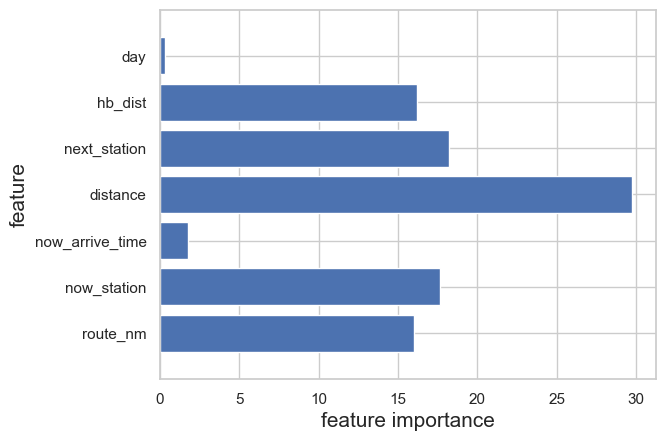

100.0

In [35]:
n_feature = X_train.shape[1] #주어진 변수들의 갯수를 구함
index = np.arange(n_feature)
x_col = list(X_train.columns)

plt.barh(index, cb_model.feature_importances_, align='center') 
plt.yticks(index, x_col)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()
np.sum(cb_model.feature_importances_)

### 6. 결과

In [34]:
result = cb_model.predict(X_test)
np_result = np.expm1(result)

df_test['next_arrive_time'] = np_result
df_test[['id', 'next_arrive_time']].to_csv('result.csv', index=False, float_format='%.14f')